In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1- Charge de dataset

In [38]:
data = pd.read_csv("Housing.csv")

# 2- Vérifier les valeurs manquantes

In [39]:
print(data.isnull().sum())

CRIM       0
ZN         0
INDUS      3
CHAS       0
NOX        2
RM         0
AGE        1
DIS        0
RAD        1
TAX        0
PTRATIO    0
B          0
LSTAT      1
MEDV       0
dtype: int64


In [40]:
data.fillna(data.mean(), inplace=True)

Vérifier les doublons

In [41]:
print(data.duplicated().sum())

4


In [42]:
data.drop_duplicates(inplace=True)

# 3- Diviser les données en features et target

In [43]:
X = data.drop("MEDV", axis=1)
y = data["MEDV"]

# 4- Diviser les données en ensembles d'apprentissage et de test

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5- Créer un modèle de régression linéaire et ajuster les données de formation

In [45]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

# 6- Faire des prédictions sur les données de test à l'aide du modèle de régression linéaire

In [46]:
lr_predictions = lr_model.predict(X_test)

# 7- Évaluer le modèle de régression linéaire à l'aide des mesures d'erreur quadratique moyenne et de R-carré

In [47]:
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)
print("Performances du modèle de régression linéaire:")
print("Mean Squared Error:", lr_mse)
print("R-Squared Score:", lr_r2)

Performances du modèle de régression linéaire:
Mean Squared Error: 20.350143125734043
R-Squared Score: 0.6582109561316328


# 8- Créez un modèle de régression Ridge et utilisez la validation croisée pour trouver la meilleure valeur alpha

In [48]:
ridge_model = Ridge()
params_ridge = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_ridge = GridSearchCV(ridge_model, params_ridge, cv=5)
grid_ridge.fit(X_train, y_train)
print("Meilleure valeur alpha pour Ridge Regression:", grid_ridge.best_params_['alpha'])

Meilleure valeur alpha pour Ridge Regression: 0.01


# 9- Entraînez le modèle de régression Ridge en utilisant la meilleure valeur alpha

In [49]:
ridge_model = Ridge(alpha=grid_ridge.best_params_['alpha'])
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.01)

# 10- Faire des prédictions sur les données de test à l'aide du modèle de régression Ridge

In [50]:
ridge_predictions = ridge_model.predict(X_test)

# 11- Évaluer le modèle de régression Ridge à l'aide des métriques Mean Squared Error et R-Squared

In [51]:
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
print("Performances du modèle de régression Ridge:")
print("Mean Squared Error:", ridge_mse)
print("R-Squared Score:", ridge_r2)

Performances du modèle de régression Ridge:
Mean Squared Error: 20.3562272246266
R-Squared Score: 0.6581087711823457


# 12- Créez un modèle de régression Lasso et utilisez la validation croisée pour trouver la meilleure valeur alpha

In [52]:
lasso_model = Lasso()
params_lasso = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_lasso = GridSearchCV(lasso_model, params_lasso, cv=5)
grid_lasso.fit(X_train, y_train)
print("Meilleure valeur alpha pour la régression au lasso:", grid_lasso.best_params_['alpha'])

Meilleure valeur alpha pour la régression au lasso: 0.01


# 13- Entraînez le modèle de régression Lasso en utilisant la meilleure valeur alpha

In [53]:
lasso_model = Lasso(alpha=grid_lasso.best_params_['alpha'])
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.01)

# 14- Faire des prédictions sur les données de test à l'aide du modèle de régression Lasso

In [54]:
lasso_predictions = lasso_model.predict(X_test)

# 15- Évaluer le modèle de régression Lasso à l'aide des métriques Mean Squared Error et R-Squared

In [55]:
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
print("Performances du modèle de régression au lasso:")
print("Mean Squared Error:", lasso_mse)
print("R-Squared Score:", lasso_r2)

Performances du modèle de régression au lasso:
Mean Squared Error: 20.478074863230326
R-Squared Score: 0.6560622898559653


# 16- Créez un modèle de régression d'arbre de décision et utilisez la validation croisée pour trouver les meilleurs hyperparamètres

In [56]:
dt_model = DecisionTreeRegressor()
params_dt = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
grid_dt = GridSearchCV(dt_model, params_dt, cv=5)
grid_dt.fit(X_train, y_train)
print("Meilleurs hyperparamètres pour la régression d'arbre de décision:", grid_dt.best_params_)

Meilleurs hyperparamètres pour la régression d'arbre de décision: {'max_depth': 7, 'min_samples_split': 5}


# 17- Train the Decision Tree Regression model using the best hyperparameters

In [57]:
dt_model = DecisionTreeRegressor(max_depth=grid_dt.best_params_['max_depth'], 
                                  min_samples_split=grid_dt.best_params_['min_samples_split'])
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_split=5)

# 18- Faire des prédictions sur les données de test à l'aide du modèle de régression d'arbre de décision

In [58]:
dt_predictions = dt_model.predict(X_test)

# 19- Évaluer le modèle de régression de l'arbre de décision à l'aide des mesures de l'erreur quadratique moyenne et du R-carré

In [59]:
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)
print("Performances du modèle de régression d'arbre de décision:")
print("Mean Squared Error:", dt_mse)
print("R-Squared Score:", dt_r2)

Performances du modèle de régression d'arbre de décision:
Mean Squared Error: 35.900438520087576
R-Squared Score: 0.39703733382006723


# 20- Créez un modèle de régression de forêt aléatoire et utilisez la validation croisée pour trouver les meilleurs hyperparamètres

In [60]:
rf_model = RandomForestRegressor()
params_rf = {'n_estimators': [50, 100, 200, 300], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 
             'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
grid_rf = GridSearchCV(rf_model, params_rf, cv=5)
grid_rf.fit(X_train, y_train)
print("Meilleurs hyperparamètres pour la régression de forêt aléatoire:", grid_rf.best_params_)

Meilleurs hyperparamètres pour la régression de forêt aléatoire: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}


# 21- Entraînez le modèle de régression de forêt aléatoire en utilisant les meilleurs hyperparamètres

In [61]:
rf_model = RandomForestRegressor(n_estimators=grid_rf.best_params_['n_estimators'], 
                                  max_depth=grid_rf.best_params_['max_depth'], 
                                  min_samples_split=grid_rf.best_params_['min_samples_split'])
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=300)

# 22- Faire des prédictions sur les données de test à l'aide du modèle de régression de forêt aléatoire

In [62]:
rf_predictions = rf_model.predict(X_test)

# 23- Évaluer le modèle de régression de forêt aléatoire à l'aide des métriques d'erreur quadratique moyenne et de R-carré

In [63]:
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print("Performances du modèle de régression de forêt aléatoire:")
print("Mean Squared Error:", rf_mse)
print("R-Squared Score:", rf_r2)

Performances du modèle de régression de forêt aléatoire:
Mean Squared Error: 18.40665047611712
R-Squared Score: 0.6908527164560485


# 24- Créez un modèle Gradient Boosting Regression et utilisez la validation croisée pour trouver les meilleurs hyperparamètres

In [64]:
gb_model = GradientBoostingRegressor()
params_gb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 3, 4],
    'learning_rate': [0.01, 0.1, 1]
}
grid_gb = GridSearchCV(gb_model, params_gb, cv=5)
grid_gb.fit(X_train, y_train)
print("Meilleurs hyperparamètres pour Gradient Boosting Regression:", grid_gb.best_params_)


Meilleurs hyperparamètres pour Gradient Boosting Regression: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


# 25- Entraînez le modèle Gradient Boosting Regression en utilisant les meilleurs hyperparamètres

In [65]:
gb_model = GradientBoostingRegressor(n_estimators=grid_gb.best_params_['n_estimators'], 
                                      max_depth=grid_gb.best_params_['max_depth'], 
                                      learning_rate=grid_gb.best_params_['learning_rate'])
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=200)

# 26- Faire des prédictions sur les données de test à l'aide du modèle Gradient Boosting Regression

In [66]:
gb_predictions = gb_model.predict(X_test)

# 28- Évaluer le modèle Gradient Boosting Regression à l'aide des métriques Mean Squared Error et R-Squared

In [67]:
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)
print("Gradient Boosting Performance du modèle de régression:")
print("Mean Squared Error:", gb_mse)
print("R-Squared Score:", gb_r2)

Gradient Boosting Performance du modèle de régression:
Mean Squared Error: 16.7017675000795
R-Squared Score: 0.7194869289373593


# 29- Comparez les performances de tous les modèles à l'aide d'un graphique à barres

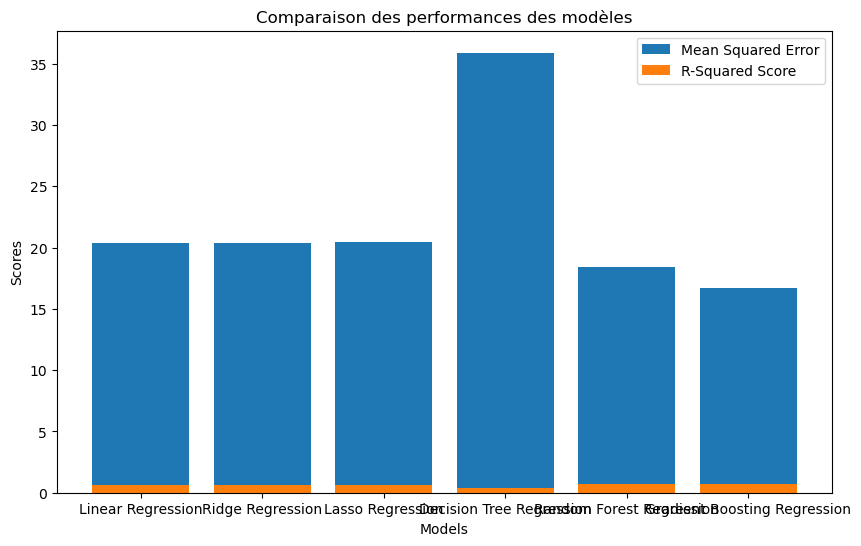

In [68]:
model_names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree Regression', 
               'Random Forest Regression', 'Gradient Boosting Regression']
mse_scores = [lr_mse, ridge_mse, lasso_mse, dt_mse, rf_mse, gb_mse]
r2_scores = [lr_r2, ridge_r2, lasso_r2, dt_r2, rf_r2, gb_r2]

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(model_names, mse_scores, label='Mean Squared Error')
ax.bar(model_names, r2_scores, label='R-Squared Score')
ax.set(title='Comparaison des performances des modèles', xlabel='Models', ylabel='Scores')
ax.legend()

plt.show()